<a href="https://colab.research.google.com/github/bintangnabiil/Machine_Learning/blob/main/Machine_Learning_CitarumWater_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kolom dalam dataset: Index(['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'pH', 'Temp', 'TSS', 'DO',
       'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'O2', 'IP', 'Class'],
      dtype='object')
Accuracy: 0.9580
Precision: 0.9581
Recall: 0.9580
F1 Score: 0.9579
AUC (macro-average): 0.9984


<ipython-input-16-38f4f8410834>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["O2"].fillna(df["O2"].mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.p

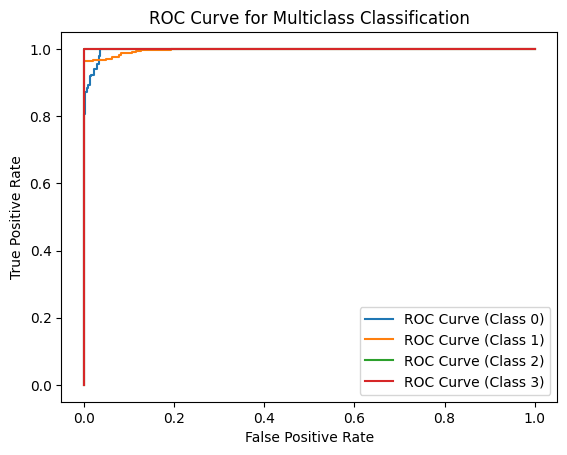

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize

# Load dataset
file_path = "CitarumWater.csv"  # Pastikan path benar
df = pd.read_csv(file_path)

# Tampilkan nama kolom untuk verifikasi
print("Kolom dalam dataset:", df.columns)

# Konversi kolom 'Temp' yang memiliki simbol °C
df["Temp"] = df["Temp"].str.replace("°C", "", regex=True).astype(float)

# Konversi 'O2' ke float, jika ada error, ubah menjadi NaN lalu isi dengan rata-rata
df["O2"] = pd.to_numeric(df["O2"], errors="coerce")
df["O2"].fillna(df["O2"].mean(), inplace=True)

# Pilih fitur dan target
X = df.drop(columns=["Class", "No", "NamaSungai", "TitikPantau", "Waktu"])
y = df["Class"]

# Cek apakah ada nilai NaN dalam fitur
if X.isnull().sum().sum() > 0:
    print("Warning: Ada nilai NaN dalam fitur, menggantinya dengan mean!")
    X.fillna(X.mean(), inplace=True)

# Split data ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Pastikan tidak ada NaN setelah scaling
imputer = SimpleImputer(strategy="mean")
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Inisialisasi dan latih model Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)

# Evaluasi model untuk klasifikasi multi-kelas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")  # Bisa juga "macro"
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Binarisasi label untuk AUC multiclass (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
auc = roc_auc_score(y_test_bin, y_prob, average="macro")
print(f"AUC (macro-average): {auc:.4f}")

# Plot ROC Curve untuk setiap kelas
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f"ROC Curve (Class {i})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass Classification")
plt.legend()
plt.show()

# Visualisasi batas keputusan jika hanya ada 2 fitur
if X.shape[1] == 2:
    mglearn.plots.plot_2d_separator(model, X_train_scaled, fill=True, alpha=0.3)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=mglearn.cm2, s=60)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()


#Persamaan Matematika
##1. Model Logistic Regression
Logistic Regression adalah model klasifikasi yang digunakan untuk memprediksi probabilitas suatu sampel termasuk ke dalam kelas tertentu. Model ini bekerja dengan mengaplikasikan fungsi sigmoid pada kombinasi linear dari fitur input:

$h_θ(x)=\frac{1}{1+e^{-(θ_0+θ_1x_1+θ_2x_2+...+θ_nx_n)}}$

Di mana:
- $h_θ (x)$ = probabilitas suatu data termasuk dalam kelas tertentu.
- $θ_0$ = bias atau intercept.
- $θ_1, θ_2, ..., θ_n$ = parameter (koefisien) yang dipelajari  oleh model.
- $x_1, x_2, ..., x_n$ = fitur input<br><br>

##2. Preprocessing Data: Standarisasi dengan StandardScaler
Standarisasi penting karena beberapa fitur dalam dataset mungkin memiliki skala yang berbeda. Jika tidak dinormalisasi, fitur dengan skala besar akan mendominasi dan membuat model tidak bekerja optimal.

$X' = \frac{X-μ}{σ}$

Di mana:
- $X'$ = fitur yang telah dinormalisasi.
- $μ$ = rata-rata fitur dalam dataset.
- $σ$ = standar deviasi fitur.<br><br>

##3. Evaluasi Model
###a) Accuracy
Accuracy mengukur proporsi prediksi yang benar terhadapa seluruh data yang diuji. Accuracy yang bagus untuk dataset yang seimbang, tetapi kurang optimal jika dataset memiliki distribusi kelas yang tidak merata.

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

- TP (True Postive) = data positif yang diklasifikasikan sebagai positif.
- TN (True Negative) = data negatif yang diklasifikasikan sebagai negatif.
- FP (False Positive) = data negatif yang diklasifikasikan sebagai positif.
- FN (False Negative) = data negatif yang diklasifikasikan sebagai negatif.<br><br>

###b) Precision
Precision mengukur seberapa akurat model dalam memprediksi positif. Presisi tinggi berarti model jarang memberikan prediksi positif yang salah.

$Precision = \frac{TP}{TP + FP}$<br><br>

###c) Recall
REcall mengukur seberapa banyak data positif yang berhasil dideteksi oleh model. Recall yang tinggi berarti model jarang melewatkan data positif yang seharusnya diklarifikasikan dengan benar.

$Recall = \frac{TP}{TP+FN}$ <br><br>

###d) F1-Score
F1-Score adalah rata-rata harmonik antara precision dan recall. F1-score berguna jika dataset memiliki distribusi kelas yang tidak seimbang, karena menggabungkan keunggulan dari precision dan recall.

$F1 = 2 \times\frac{Precision\times Recall}{Precision+Recall}$ <br><br>

###e) Area Under Curve (AUC) dan Reciever Operating Characteristic (ROC)
AUC dan ROC digunakan untuk mengevaluasi model berdasarkan kurva trade-off antara True Positive Rate (TPR) dan False Positive Rate (FPR). ROC Curve merupakan grafik antara FPR (sumbu X) dan TPR (sumbu Y). Kalau AUC mengukur luas are di bawah kurva tersebut, dengan nilai semakin dekat ke 1 menunjukkan model yang lebih baik. Kemudian untuk multi-class classification menggunakan metode One-vs_Rest (OvR) untuk menghitung ROC Curve dan AUC.

- $TPR = \frac{TP}{TP+FN}$
- $FPR = \frac{FP}{FP+TN}$

